## <center>CMSC6950 | Fall 2023<center>
## <center>Project: St. John's Climate Data Analysis<center>
## <center>Mohammadali Mirmojarabian, 202292543<center>
___

We want to analyze St. John's climate data. To access data source and for a comprehensive information about the data please refer to https://stjohns.weatherstats.ca/download.html.
<!-- For Frequently Asked Questions visit [here](https://www.weatherstats.ca/faq/#copying). -->

We downloaded 730 (two-year) daily climatic data points. In this specific project, we don't need to examine all measurements:
- `max_temperature` and `min_temperature`: Maximum and Minimum Temperature (**°C**)

- `avg_temperature` is the average between the daily maximum and minimum temperatures, while `avg_hourly_temperature` is the average of all the hourly temperatures within the day.

- `max_wind_speed` and `min_wind_speed`: Maximum and Minimum Wind Speed (**km/h**)

- `precipitation`: Precipitation (**mm**): The amount of rain/snow/etc. received. Snow is melted to create a water equivalent. 1cm snow is approx. 1mm of precipitation, but the exact amount depends on the snow density (e.g., corn snow vs light fluffy snow).

Other Features:
- `avg_hourly_relative_humidity`: (**%**)
- `avg_hourly_pressure_sea`: (**kPa**)
- `avg_hourly_visibility`: (**m**)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.dates import MonthLocator, DateFormatter
from functions import *

In [2]:
cols = ['date',
        'max_temperature','min_temperature','avg_hourly_temperature','avg_temperature',\
        'max_wind_speed','avg_hourly_wind_speed','min_wind_speed','precipitation',\
        'avg_hourly_relative_humidity','avg_hourly_pressure_sea','avg_hourly_visibility']

df = pd.read_csv('../data/daily.csv', parse_dates=['date'], index_col=['date'], dayfirst=True, usecols=cols)
df

max_temperature  avg_hourly_temperature  avg_temperature  \
date                                                                   
2023-10-31              2.8                    0.72             0.74   
2023-10-30              6.8                    3.23             3.35   
2023-10-29             12.5                    8.43             7.65   
2023-10-28             14.6                    9.01             9.60   
2023-10-27              9.5                    5.28             5.85   
...                     ...                     ...              ...   
2021-11-05              5.3                    2.37             2.35   
2021-11-04             10.3                    5.03             5.35   
2021-11-03             10.9                    5.16             6.20   
2021-11-02             13.2                    8.91             7.60   
2021-11-01             10.9                    8.28             8.75   

            min_temperature  avg_hourly_relative_humidity  max_wind_speed  \
date                                                                        
2023-10-31             -1.3                          92.4              25   
2023-10-30             -0.1                          59.6              53   
2023-10-29              2.8                          73.9              49   
2023-10-28              4.6                          94.5              37   
2023-10-27              2.2                          82.8              19   
...                     ...                           ...             ...   
2021-11-05             -0.6                          82.4              29   
2021-11-04              0.4                          83.2              52   
2021-11-03              1.5                          79.6              19   
2021-11-02              2.0                          89.4              30   
2021-11-01              6.6                          98.8              42   

            avg_hourly_wind_speed  min_wind_speed  avg_hourly_pressure_sea  \
date                                                                         
2023-10-31                  13.38               3                   100.52   
2023-10-30                  31.54               1                   100.98   
2023-10-29                  37.29              24                   100.28   
2023-10-28                  25.46              12                   101.29   
2023-10-27                  12.67               7                   102.33   
...                           ...             ...                      ...   
2021-11-05                  11.42               3                   102.35   
2021-11-04                  26.79               8                   101.75   
2021-11-03                   9.79               3                   102.06   
2021-11-02                  17.12               3                   101.59   
2021-11-01                  30.67              21                   101.47   

            avg_hourly_visibility  precipitation  
date                                              
2023-10-31                15395.8            7.4  
2023-10-30                20725.0            4.4  
2023-10-29                24100.0            0.0  
2023-10-28                17591.7           15.6  
2023-10-27                24100.0            0.8  
...                           ...            ...  
2021-11-05                21270.8           18.4  
2021-11-04                24100.0            0.0  
2021-11-03                24100.0            0.0  
2021-11-02                17637.5            0.0  
2021-11-01                 8012.5            1.3  

[730 rows x 11 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2023-10-31 to 2021-11-01
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   max_temperature               730 non-null    float64
 1   avg_hourly_temperature        730 non-null    float64
 2   avg_temperature               730 non-null    float64
 3   min_temperature               730 non-null    float64
 4   avg_hourly_relative_humidity  730 non-null    float64
 5   max_wind_speed                730 non-null    int64  
 6   avg_hourly_wind_speed         730 non-null    float64
 7   min_wind_speed                730 non-null    int64  
 8   avg_hourly_pressure_sea       730 non-null    float64
 9   avg_hourly_visibility         730 non-null    float64
 10  precipitation                 730 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 68.4 KB


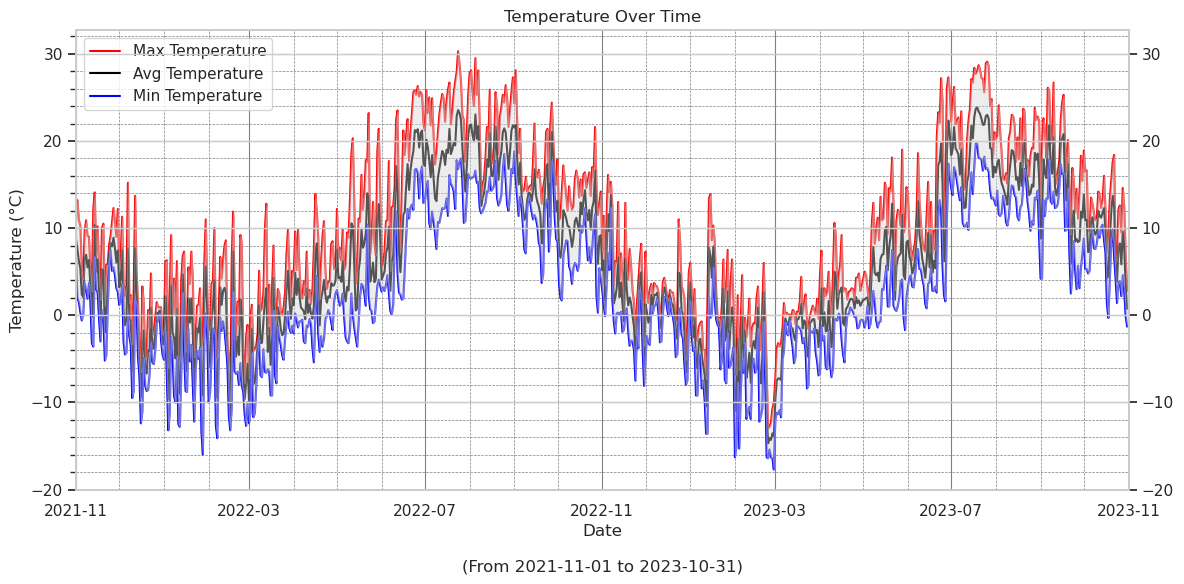

In [23]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a time series plot for temperature
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the temperature columns with Seaborn
sns.lineplot(data=df, x=df.index, y='max_temperature', ax=ax, label='Max Temperature', color='red')
sns.lineplot(data=df, x=df.index, y='avg_temperature', ax=ax, label='Avg Temperature', color='black')
sns.lineplot(data=df, x=df.index, y='min_temperature', ax=ax, label='Min Temperature', color='blue')

# Customize the plot
ax.set_xlabel('Date\n\n(From 2021-11-01 to 2023-10-31)')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Temperature Over Time')

# Set grids
ax.minorticks_on()
plt.grid(True, which='major', linestyle='-', linewidth=0.8, color='gray')
plt.grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')

# Create a new axes for fill_between plot
ax_fill = ax.twinx()
# Plot fill_between
temp = df[['min_temperature', 'max_temperature', 'avg_temperature']]
ax_fill.fill_between(x=df.index, y1=temp['min_temperature'], y2=temp['max_temperature'], alpha=0.4, color='lightgray')

ax.set_xlim((df.index.min(), df.index.max()+pd.Timedelta(days=1)))

month_locator = MonthLocator(interval=4)
ax.xaxis.set_major_locator(month_locator)

ax.xaxis.set_minor_locator(MonthLocator())

plt.tight_layout()
plt.savefig('../figures/First-plot-proposal.png', facecolor='w', dpi=1000)
plt.show()

## Doing Basic Analysis

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2023-10-31 to 2021-11-01
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   max_temperature               730 non-null    float64
 1   avg_hourly_temperature        730 non-null    float64
 2   avg_temperature               730 non-null    float64
 3   min_temperature               730 non-null    float64
 4   avg_hourly_relative_humidity  730 non-null    float64
 5   max_wind_speed                730 non-null    int64  
 6   avg_hourly_wind_speed         730 non-null    float64
 7   min_wind_speed                730 non-null    int64  
 8   avg_hourly_pressure_sea       730 non-null    float64
 9   avg_hourly_visibility         730 non-null    float64
 10  precipitation                 730 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 68.4 KB


In [25]:
df.describe()

max_temperature  avg_hourly_temperature  avg_temperature  \
count       730.000000              730.000000       730.000000   
mean         10.135068                6.206123         6.350493   
std           9.271536                8.350654         8.571353   
min         -13.000000              -15.070000       -14.700000   
25%           2.700000               -0.187500        -0.167500   
50%           9.450000                5.060000         5.150000   
75%          17.150000               12.977500        13.300000   
max          30.300000               24.330000        23.850000   

       min_temperature  avg_hourly_relative_humidity  max_wind_speed  \
count       730.000000                    730.000000      730.000000   
mean          2.567260                     84.841781       38.179452   
std           8.214876                     10.595674       13.046056   
min         -17.700000                     46.600000       12.000000   
25%          -3.000000                     78.200000       28.000000   
50%           1.350000                     86.100000       36.000000   
75%          10.050000                     93.675000       46.000000   
max          19.700000                    100.000000       83.000000   

       avg_hourly_wind_speed  min_wind_speed  avg_hourly_pressure_sea  \
count             730.000000      730.000000               730.000000   
mean               24.634151       11.552055               101.344863   
std                 9.386756        8.096513                 0.973322   
min                 7.290000        1.000000                98.040000   
25%                17.550000        5.000000               100.792500   
50%                23.645000        9.000000               101.480000   
75%                30.030000       16.000000               102.000000   
max                60.610000       49.000000               104.090000   

       avg_hourly_visibility  precipitation  
count             730.000000     730.000000  
mean            18899.052055       4.349315  
std              6603.218004       8.820890  
min               250.000000       0.000000  
25%             16321.850000       0.000000  
50%             21910.400000       0.400000  
75%             24100.000000       4.400000  
max             24100.000000      80.600000

## Histograms

In [34]:
def plot_histograms_density(df, columns):
    fig, axs = plt.subplots(len(columns), 1, figsize=(20,50))
    i = 0
    for c in columns:
        df[c].hist(ax=axs[i], density=True, label="normalized histogram plot") # normalizes the density
        df[c].plot.density(ax=axs[i], label="probability density plot")
        axs[i].set(title=f"{c} probabilities VS. {c} values")
        axs[i].legend(loc="upper right")
        i+=1

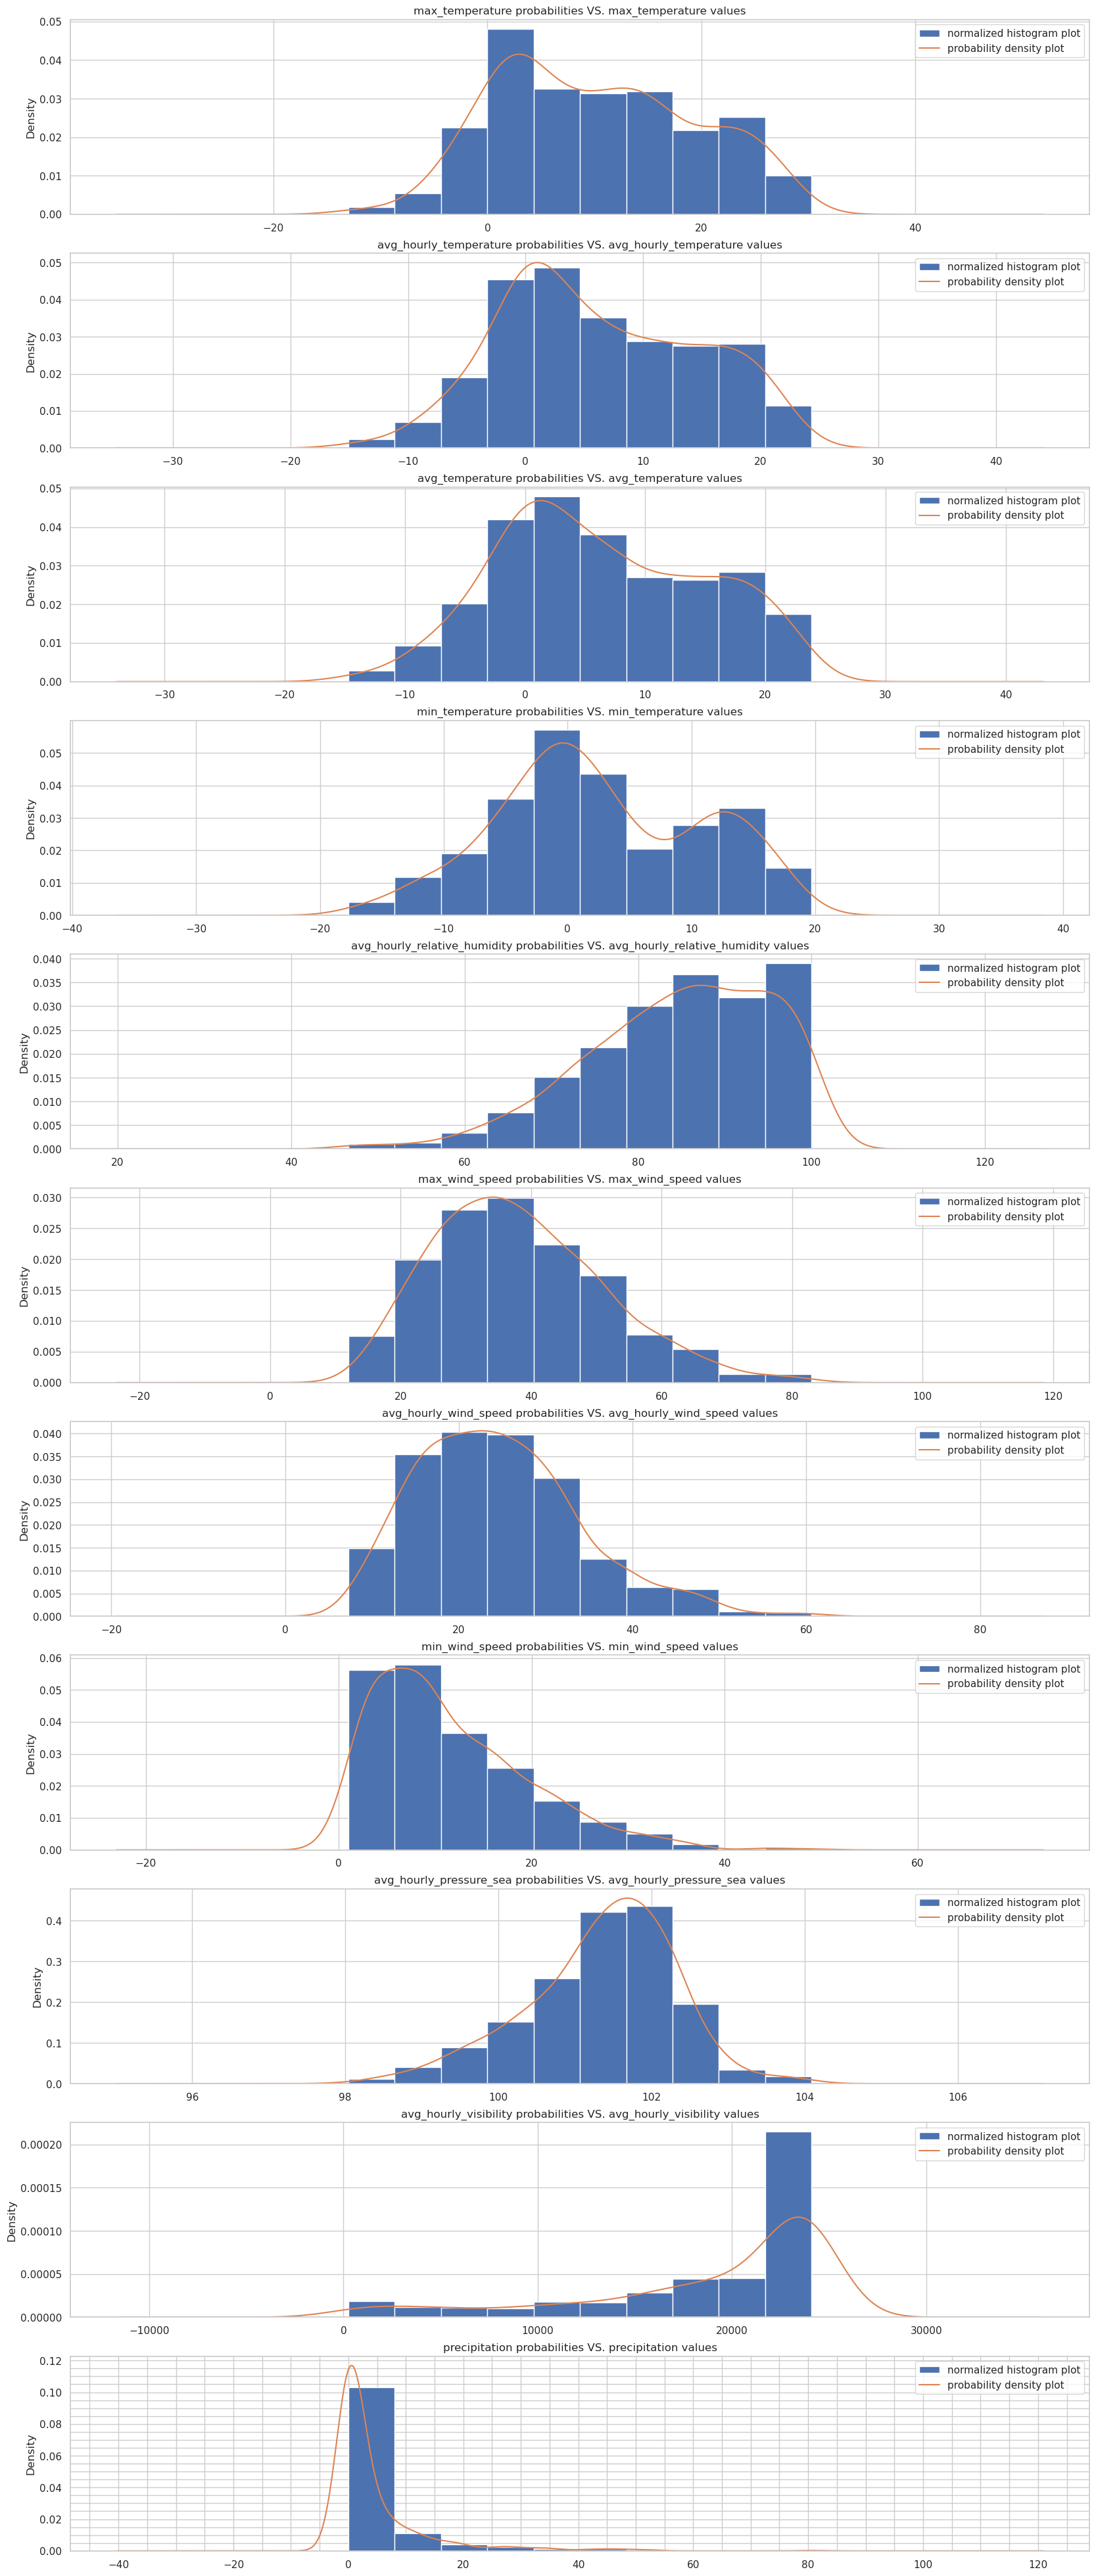

In [33]:
plot_histograms_density(df, df.columns)

## Boxplots

In [35]:
def boxplots(df, columns):
    fig, axs = plt.subplots(len(columns), 1, figsize=(20, 50))
    axs = axs.flatten()
    i=0
    for c in columns:
        df.boxplot(c, ax=axs[i], vert=False) #c = df.columns[i]: column name
        axs[i].set_title(f'Boxplot of the "{c}" data')
        i+=1
    plt.show()

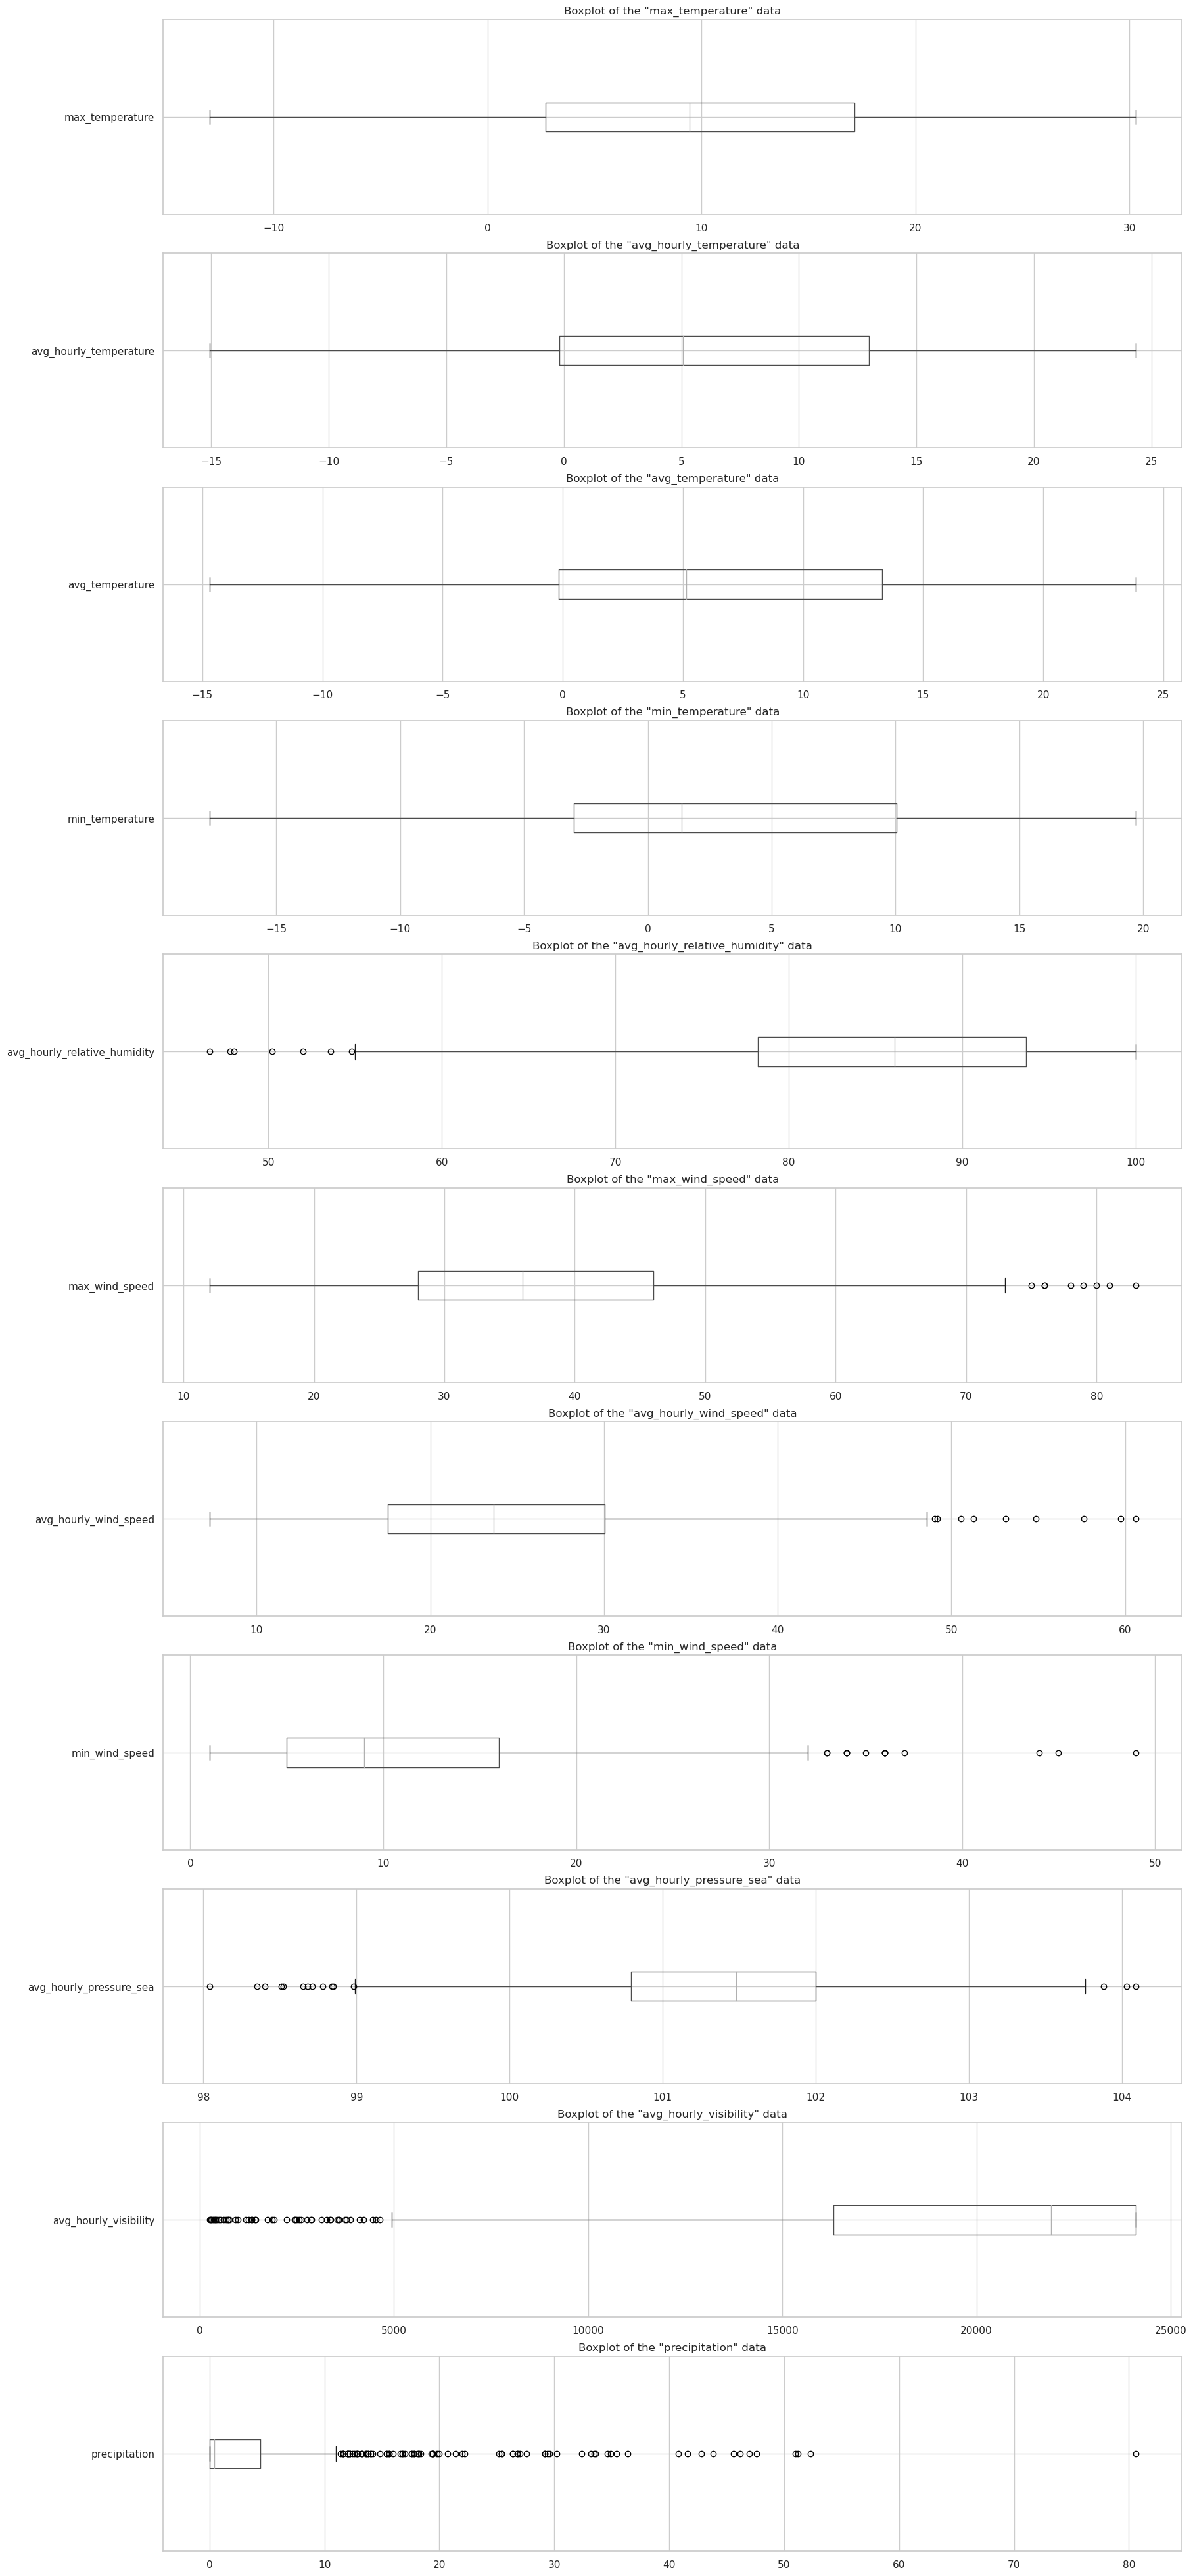

In [36]:
boxplots(df, df.columns)

## Time Series Illustration

In [41]:
# we define a function to automatically plot each attribute time series.
def time_plot(df, columns):
    fig, axs = plt.subplots(len(columns), 1, figsize=(20, 50))
    axs = axs.flatten()
    i=0
    for c in columns:
        # df[c].plot(ax=axs[i])
        sns.lineplot(data=df, x=df.index, y=c, ax=axs[i]) #label='Max Temperature', color='red'
        axs[i].set(title=f'Plot of the \"{c}\" data   [{c} values VS. Time]')
        i+=1
        
    plt.tight_layout()
    plt.show()

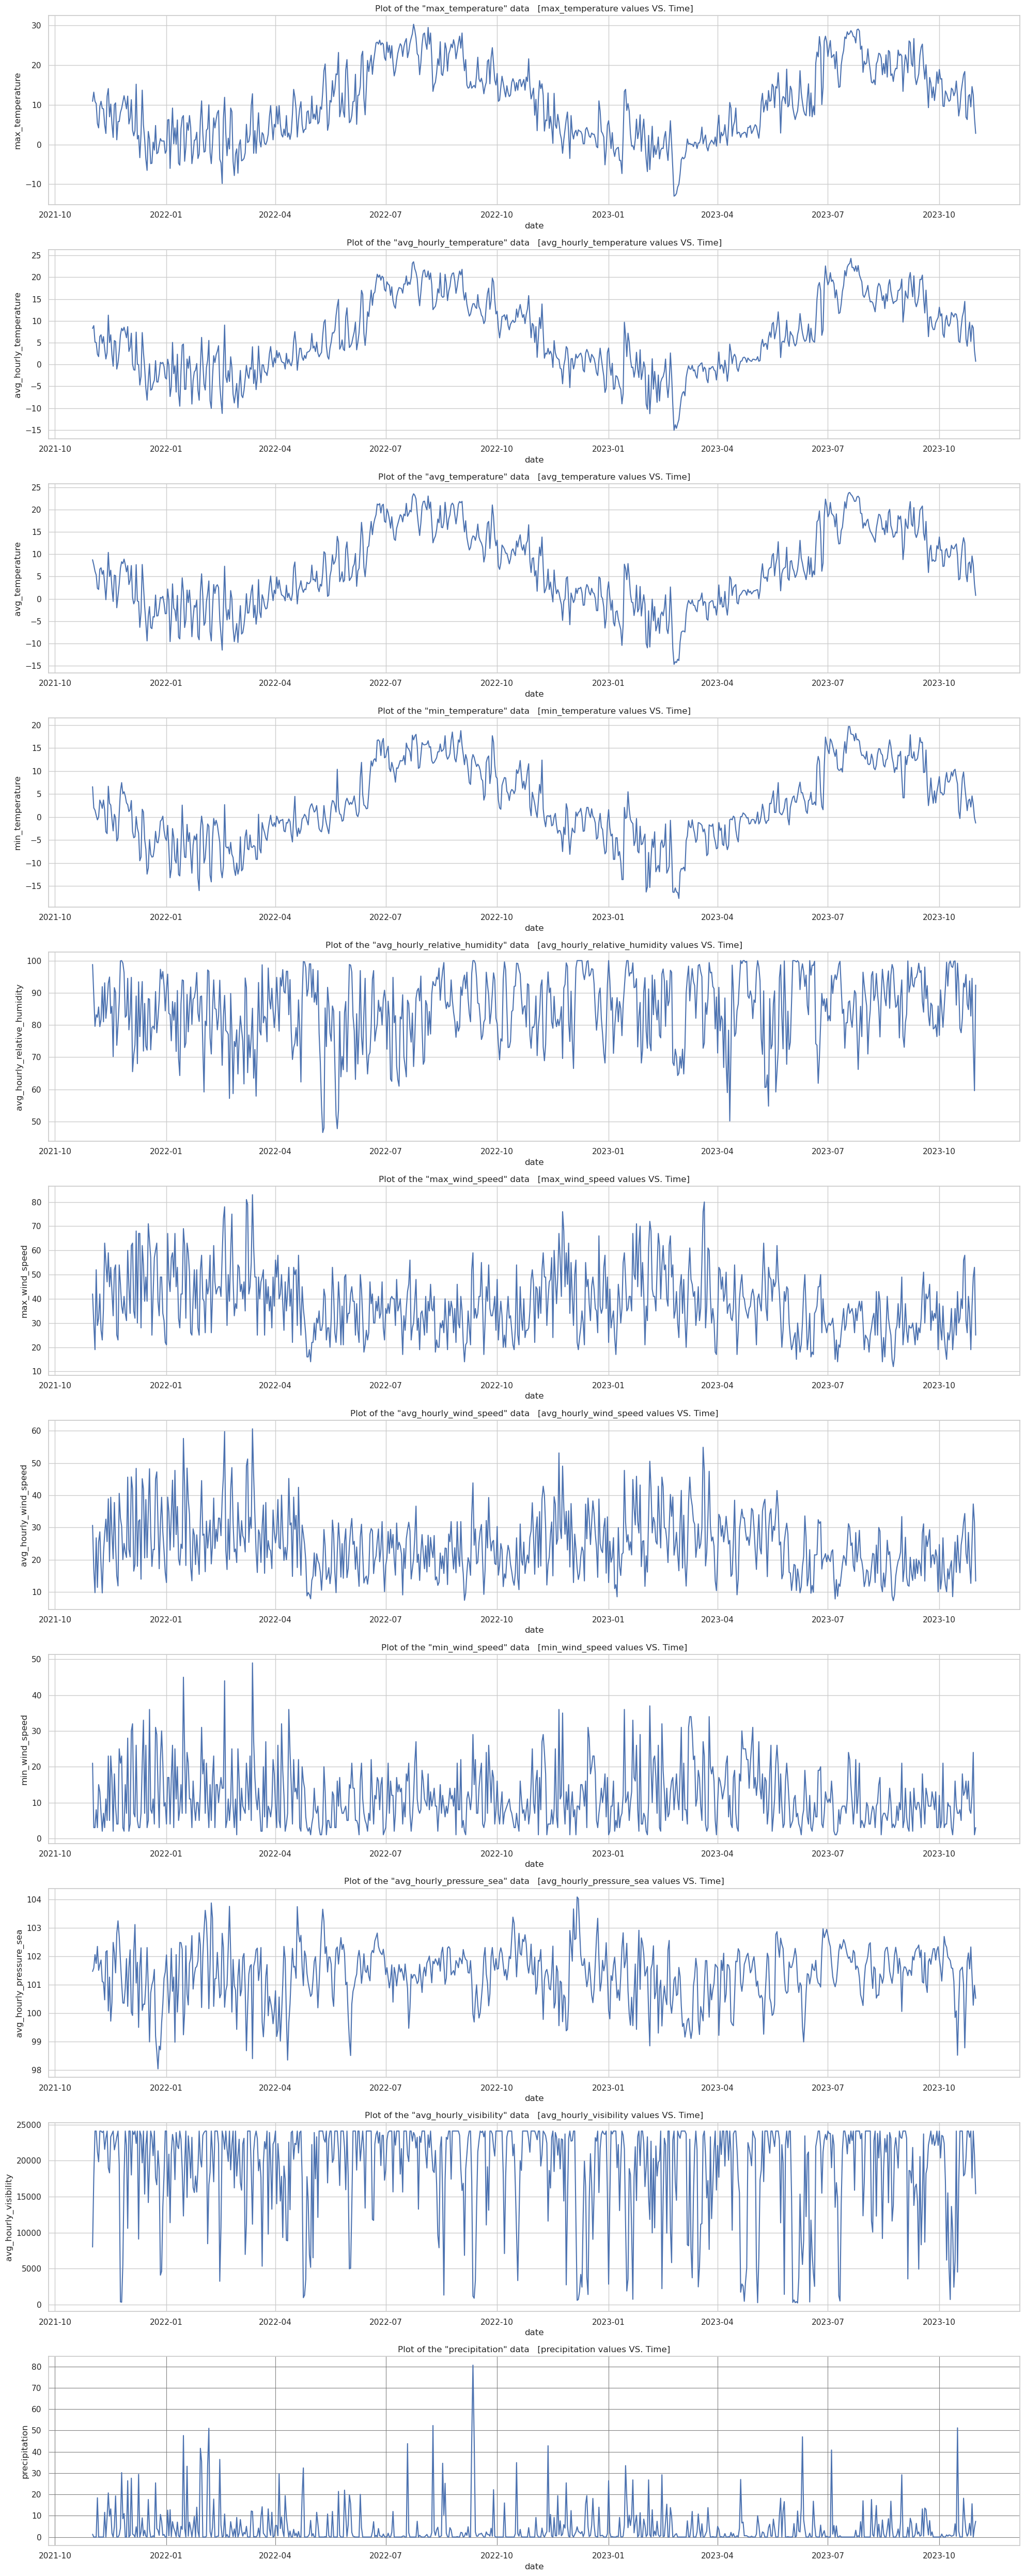

In [42]:
time_plot(df, df.columns)

## Removing Outliers

### Interquartile Range Method

In [55]:
def remove_outliers_IQR(df, columns, scale=1.5, mode="replace"):
    outliers = pd.DataFrame()
    for c in columns:
        [low_lim, high_lim] = iqr_limits(data=df[c], scale=scale)
        # To show what percentage of each column are outliers
        Outs = df[c][(df[c] > high_lim) | (df[c] < low_lim)]
        Out_Ratio = 100*(len(Outs)/len(df[c]))
        print(f"Outliers Ratio of {c} was: %{np.round(Out_Ratio, 2)}")
        # print(f"High Limit of ({c}): {high_lim};\t Low Limit of ({c}): {low_lim}")

        ## We can replace or remove the outliers: replace/remove
        if mode == "remove":
            indexes = Outs.index
            df.loc[indexes, c] = np.nan # put nan
        else:
            df[c] = np.where(df[c] >= high_lim, high_lim, np.where(df[c] <= low_lim, low_lim, df[c])) # replace
        
    print("\n")
    df.info()

We create a function to plot two dataframes together:
the original one and the modified dataframe resulted from the methods we are applying to it.

In [56]:
def plot_orig_modif_series(original, modified, columns):
    fig, axs = plt.subplots(len(columns), 1, figsize=(22,30))
    axs = axs.flatten()
    x_range = (original.index.min(), original.index.max())
    i = 0
    for c in columns:
        # because our data is large, and is measured hourly,
        # we use every n_th row to visualize our data less densely.
        original[c][::5].plot(ax=axs[i], title=c, xlim=x_range, label='Original', linewidth=3, color='black', alpha=1)
        modified[c][::5].plot(ax=axs[i], title=c, xlim=x_range, label='Modified', linewidth=3, color='red', alpha=0.6)
        axs[i].legend(loc='upper right')
        axs[i].set(title=f'{c} values VS. Time')
        
        i+=1
    plt.tight_layout()

Outliers Ratio of max_temperature was: %0.0
Outliers Ratio of avg_hourly_temperature was: %0.0
Outliers Ratio of avg_temperature was: %0.0
Outliers Ratio of min_temperature was: %0.0
Outliers Ratio of avg_hourly_relative_humidity was: %0.96
Outliers Ratio of max_wind_speed was: %1.1
Outliers Ratio of avg_hourly_wind_speed was: %1.23
Outliers Ratio of min_wind_speed was: %1.92
Outliers Ratio of avg_hourly_pressure_sea was: %2.05
Outliers Ratio of avg_hourly_visibility was: %6.85
Outliers Ratio of precipitation was: %12.19


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2023-10-31 to 2021-11-01
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   max_temperature               730 non-null    float64
 1   avg_hourly_temperature        730 non-null    float64
 2   avg_temperature               730 non-null    float64
 3   min_temperature               730 non-null    f

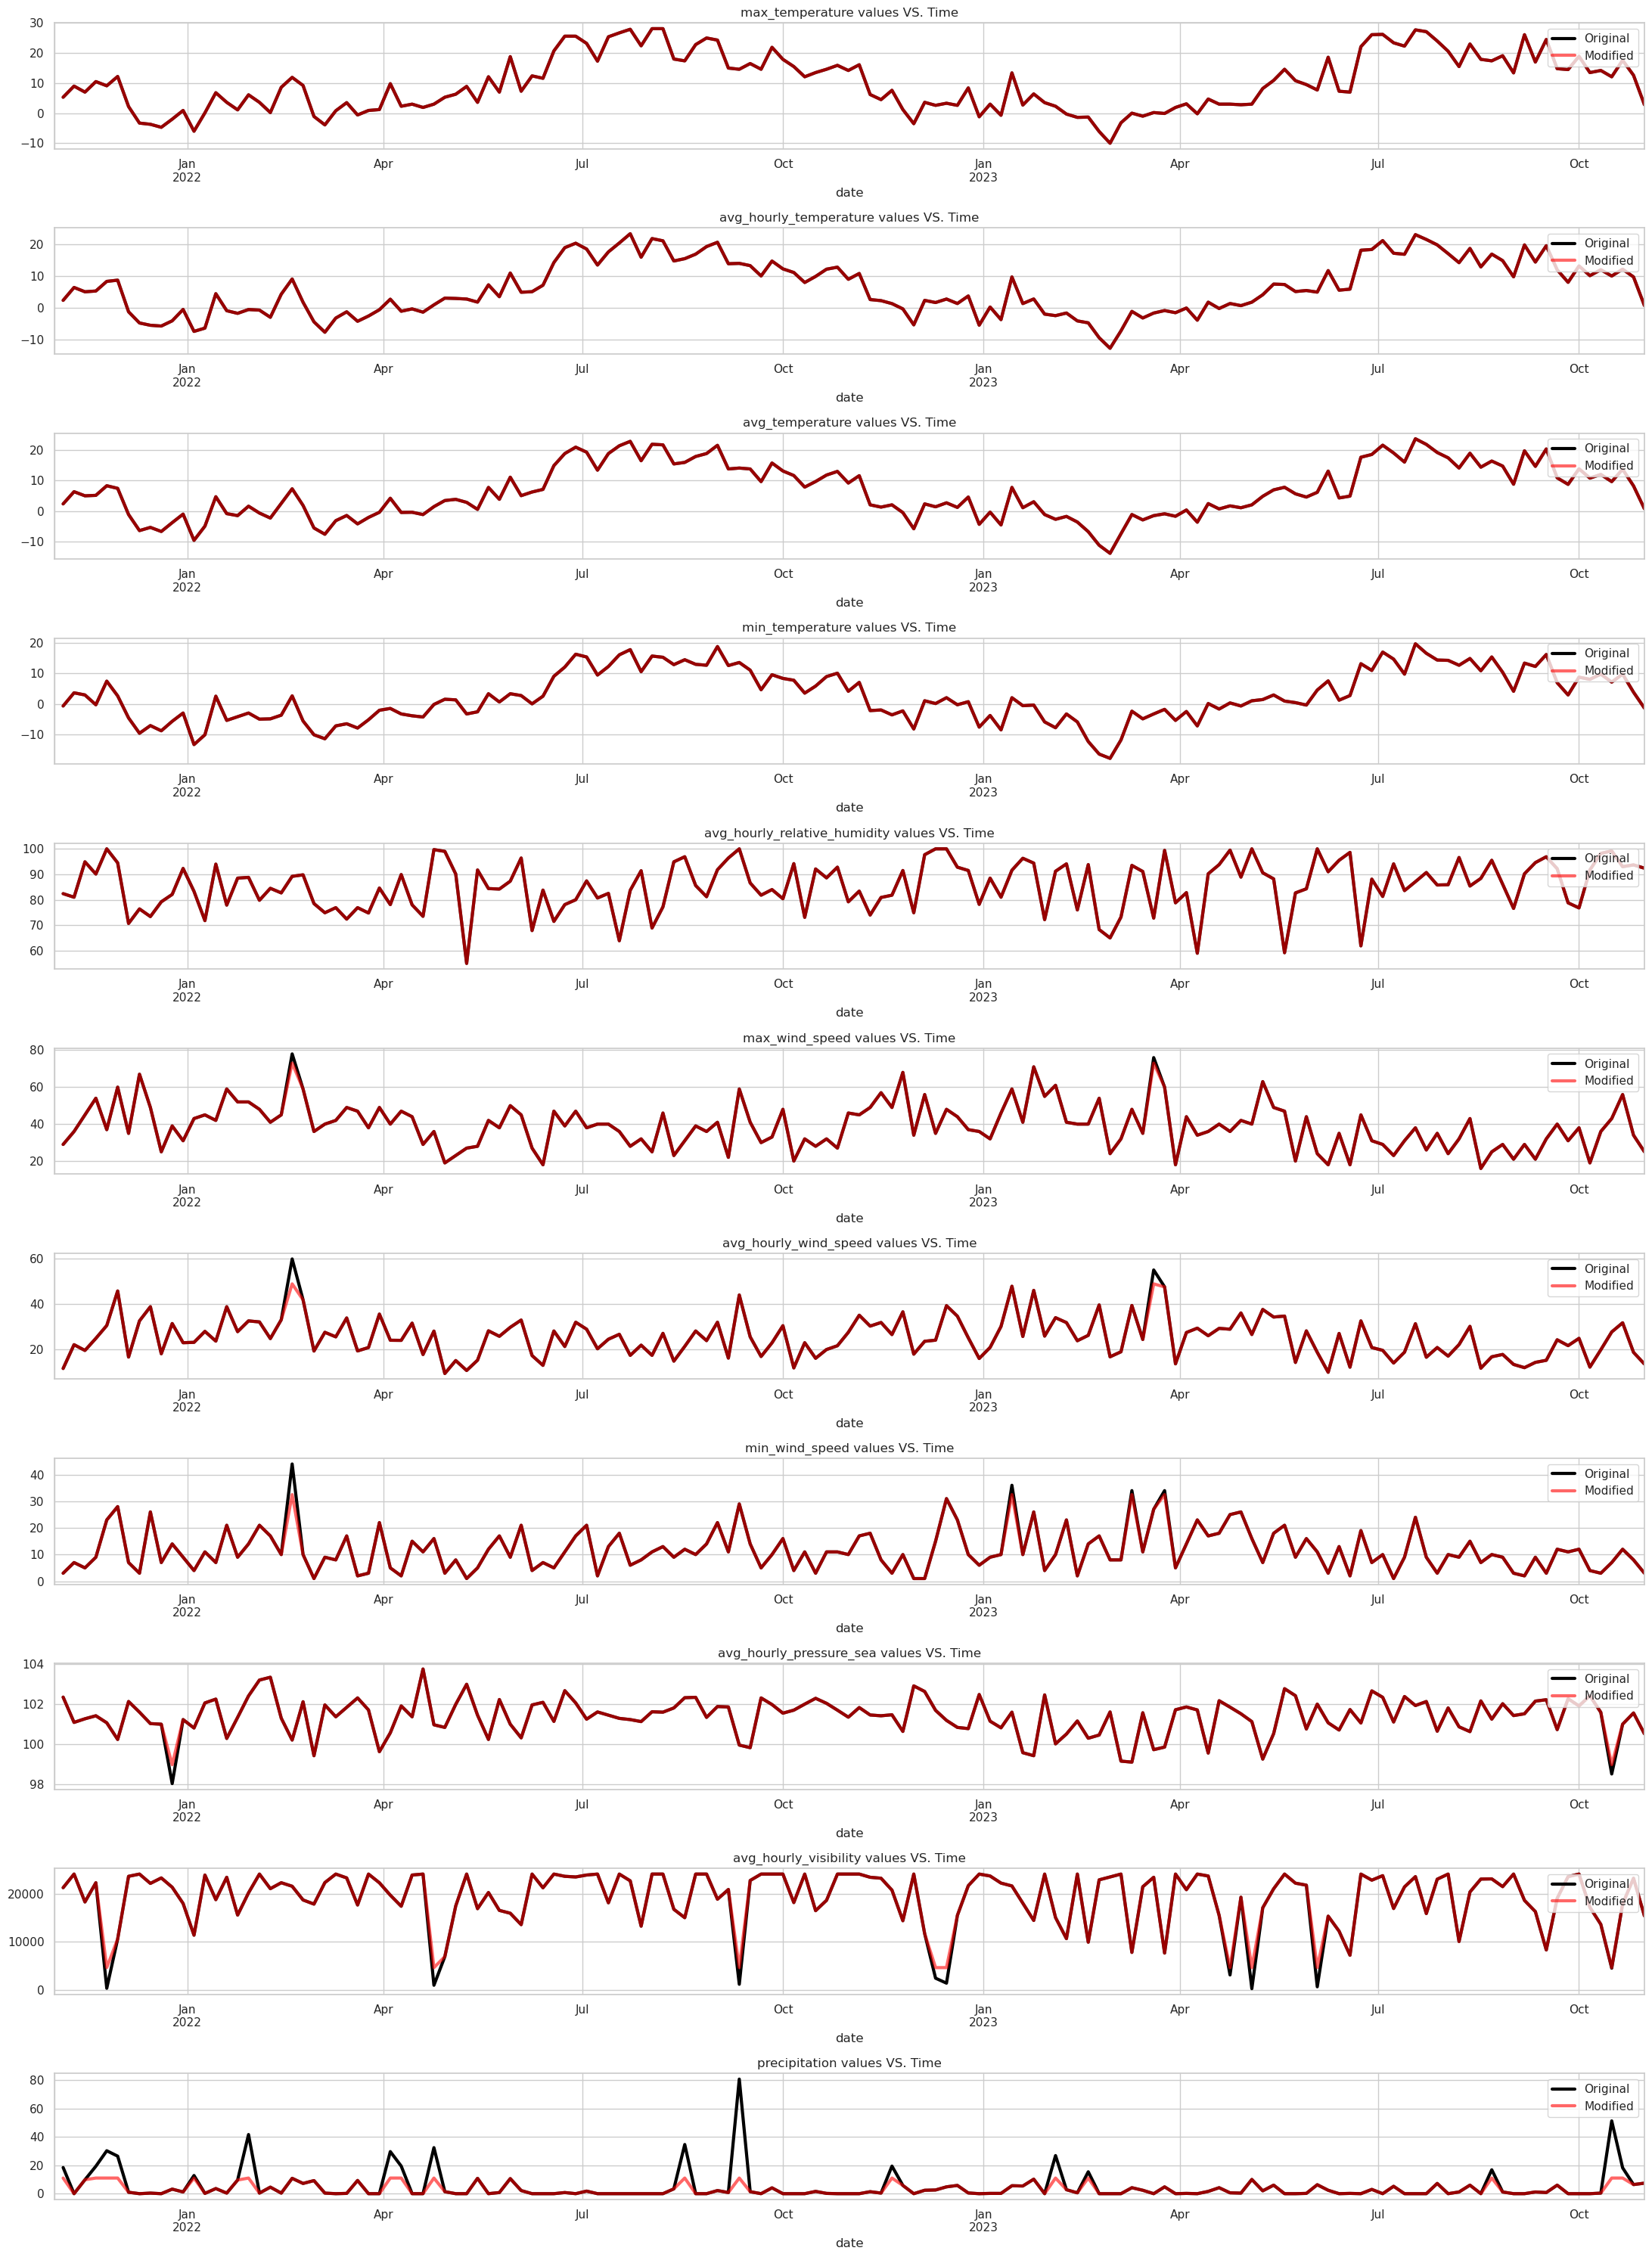

In [59]:
df_iqr = df.copy()        
remove_outliers_IQR(df_iqr, df_iqr.columns, scale=1.5)
plot_orig_modif_series(original=df, modified=df_iqr, columns=df_iqr.columns)

## Historical Data

In [3]:
hist_cols = ['date',\
        'max_temperature_v','min_temperature_v',\
        'max_wind_speed_v','min_wind_speed_v',\
        'precipitation_v']

df_hist = pd.read_csv('../data/normal_daily.csv', parse_dates=['date'], index_col=['date'], dayfirst=True, usecols=hist_cols)
df_hist

max_temperature_v  max_wind_speed_v  min_temperature_v  \
date                                                                 
2023-10-31               9.15             36.74               2.37   
2023-10-30               9.20             36.40               2.47   
2023-10-29               9.32             36.22               2.59   
2023-10-28               9.55             36.17               2.79   
2023-10-27               9.65             35.67               2.93   
...                       ...               ...                ...   
2021-11-05               8.42             37.43               1.63   
2021-11-04               8.46             37.48               1.77   
2021-11-03               8.54             37.17               1.90   
2021-11-02               8.68             37.19               2.06   
2021-11-01               8.88             37.08               2.18   

            min_wind_speed_v  precipitation_v  
date                                           
2023-10-31              9.03             5.19  
2023-10-30              8.94             5.01  
2023-10-29              8.91             4.97  
2023-10-28              9.08             5.07  
2023-10-27              8.98             5.02  
...                      ...              ...  
2021-11-05              9.51             5.28  
2021-11-04              9.52             5.48  
2021-11-03              9.40             5.41  
2021-11-02              9.47             5.52  
2021-11-01              9.38             5.45  

[730 rows x 5 columns]

As my (temperature) data follows a cyclical pattern and experiences regular bumps based on seasonal variations, the assumption of a normal distribution may not hold. So we don't use the Interquartile Range (IQR) method for detecting outliers.

In [52]:
def historical_extremes(data, history_data, sensitivity=10):
    if len(data) == 0:
        return None
    if not isinstance(sensitivity, (float, int)) or sensitivity < 0:
        sensitivity = 10
    #---------------------------------------------------------------- dataframe
    # data = pd.DataFrame({data.name: data})
    # data["flag"] = 'Normal'
    # col = data[data.columns[0]]
    # data.loc[(col < history_data - sensitivity) | (col > history_data + sensitivity), 'flag'] = 'Extreme'
    # data
    # Extreme = data[data['flag'] == 'Extreme']
    # return Extreme
    #---------------------------------------------------------------- series
    # data = np.array(data); history_data = np.array(history_data)
    flags = np.where((data < history_data - sensitivity) |
                    (data > history_data + sensitivity),
                    'Extreme', 'Normal')

    extreme_indices = np.where(flags == 'Extreme')[0]
    extreme_data = data[extreme_indices]

    return extreme_data

In [49]:
df_c = df.copy()
data = df_c['max_temperature'].copy()
history_data = df_hist['max_temperature_v']
sensitivity = 10

**Extremes for Max Temperature (More than "5" days)**
count    205.000000
mean      13.183902
std       10.825908
min      -13.000000
25%        6.400000
50%       13.400000
75%       23.500000
max       30.300000
Name: max_temperature, dtype: float64


**Extremes for Min Temperature (More than "5" days)**
       max_temperature  avg_hourly_temperature  avg_temperature  \
count       138.000000              138.000000       138.000000   
mean         11.418841                7.698188         7.804565   
std          11.731936               10.893723        11.244500   
min         -13.000000              -15.070000       -14.700000   
25%           3.000000                0.480000         0.822500   
50%          11.600000                7.475000         7.725000   
75%          22.375000               18.372500        18.380000   
max          28.800000               24.330000        23.850000   

       min_temperature  avg_hourly_relative_humidity  max_wind_speed  \
count       138.

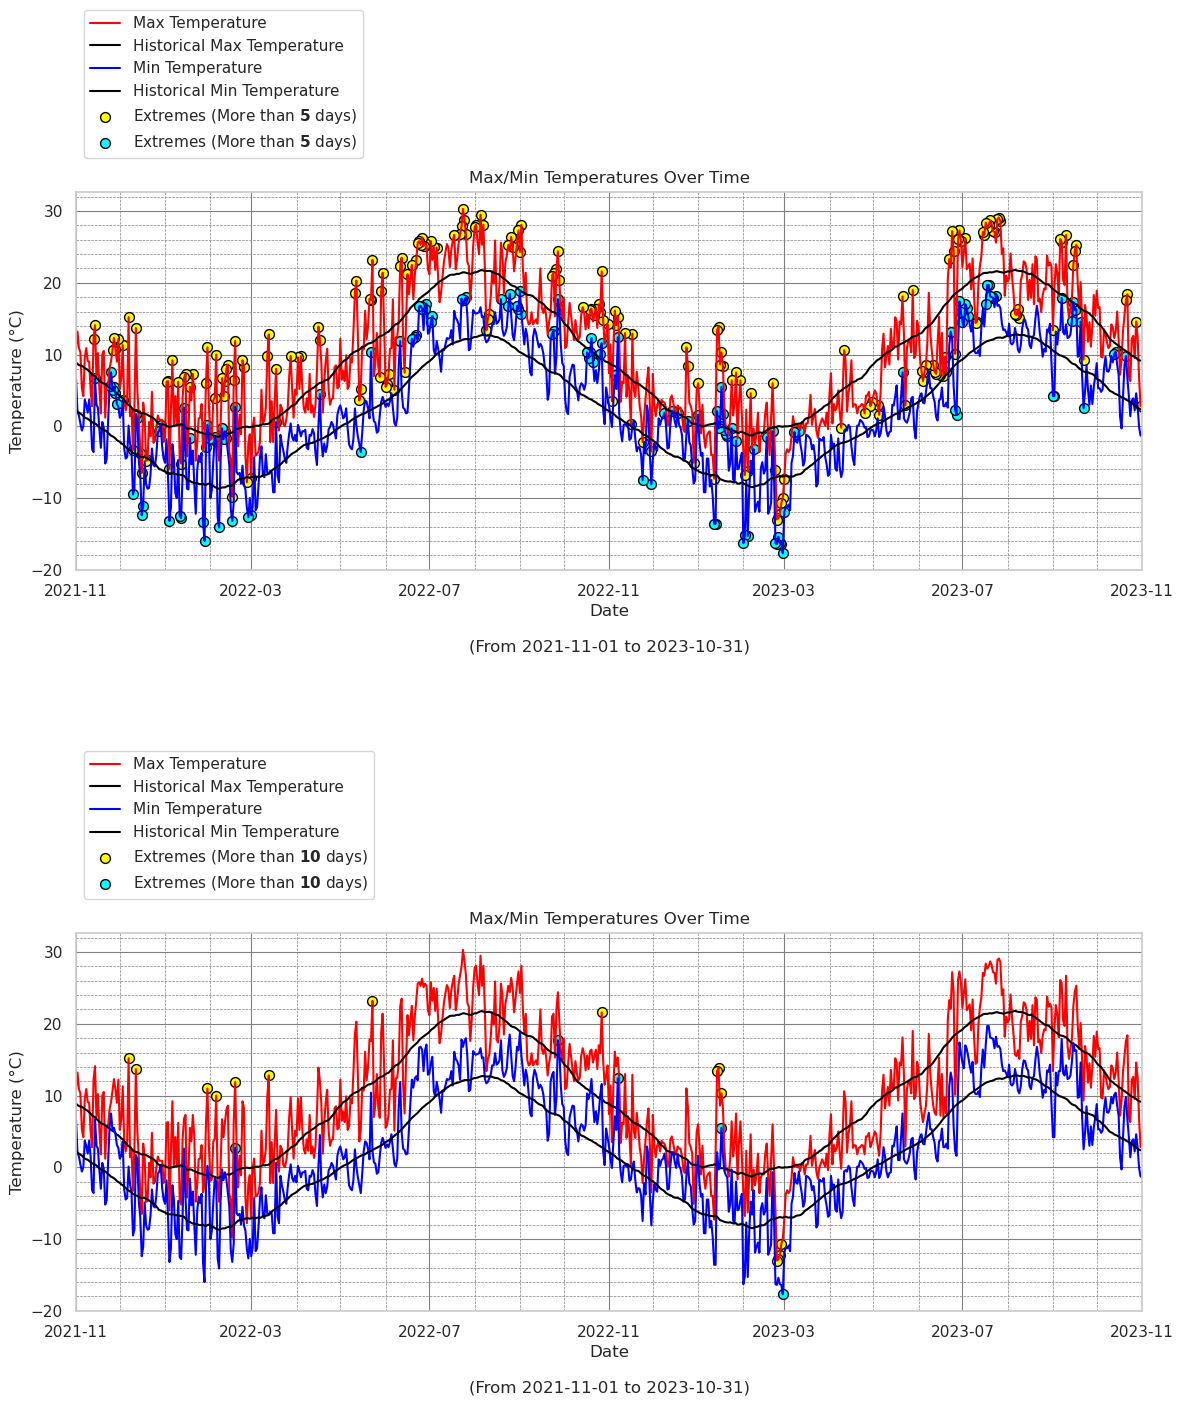

In [53]:
# Set the style for Seaborn
sns.set(style="whitegrid")
df_c = df.copy()

sens = [5, 10]  #sensitivities
# Create a time series plot for temperature
fig, ax = plt.subplots(len(sens), 1, figsize=(12, 15))
axs = ax.flatten()
c1 = 'max_temperature'
c2 = 'min_temperature'

for i, s in enumerate(sens):
    # Plot the temperature columns with Seaborn
    sns.lineplot(data=df_c, x=df_c.index, y=c1, ax=axs[i], label='Max Temperature', color='red')
    sns.lineplot(data=df_hist, x=df_hist.index, y='max_temperature_v', ax=axs[i], label='Historical Max Temperature', color='black')

    sns.lineplot(data=df_c, x=df_c.index, y=c2, ax=axs[i], label='Min Temperature', color='blue')
    sns.lineplot(data=df_hist, x=df_hist.index, y='min_temperature_v', ax=axs[i], label='Historical Min Temperature', color='black')

    data_extreme = historical_extremes(df_c['max_temperature'], df_hist['max_temperature_v'], sensitivity=s)
    label = rf"Extremes (More than $\bf{str(s)}$ days)"
    axs[i].scatter(data_extreme.index, data_extreme, label=label, color='yellow', marker='o', s=50, edgecolors= "black")
    print(f"**Extremes for Max Temperature (More than \"{s}\" days)**\n{data_extreme.describe()}\n\n")

    df_c['flag'] = 'Normal'
    df_c.loc[(df_c[c2] < df_hist['min_temperature_v']-s) | (df_c[c2] > df_hist['min_temperature_v']+s), 'flag'] = 'Extreme'
    df_ext = df_c[df_c['flag'] == 'Extreme']
    axs[i].scatter(df_ext.index, df_ext[c2], label=label, color='cyan', marker='o', s=50, edgecolors= "black")
    print(f"**Extremes for Min Temperature (More than \"{s}\" days)**\n{df_ext.describe()}\n\n")

    # Customize the plot
    axs[i].set_xlabel('Date\n\n(From 2021-11-01 to 2023-10-31)')
    axs[i].set_ylabel('Temperature (°C)')
    axs[i].set_title('Max/Min Temperatures Over Time')

    # Set grids
    axs[i].minorticks_on()
    axs[i].grid(True, which='major', linestyle='-', linewidth=0.8, color='gray')
    axs[i].grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')

    axs[i].set_xlim((df_c.index.min(), df_c.index.max()+pd.Timedelta(days=1)))

    month_locator = MonthLocator(interval=4)
    axs[i].xaxis.set_major_locator(month_locator)
    axs[i].xaxis.set_minor_locator(MonthLocator())

    # axs[i].legend()
    # Move the legend outside the plot
    axs[i].legend(loc='upper left', bbox_to_anchor=(0, 1.5))

    plt.tight_layout()

# plt.savefig('../figures/First-plot-proposal.png', facecolor='w', dpi=1000)
plt.show()

- What is the frequency, range, and variability of these extreme values?
- Are there correlations between extreme values in different variables?
- Are extreme values associated with particular times or conditions?

## Trends

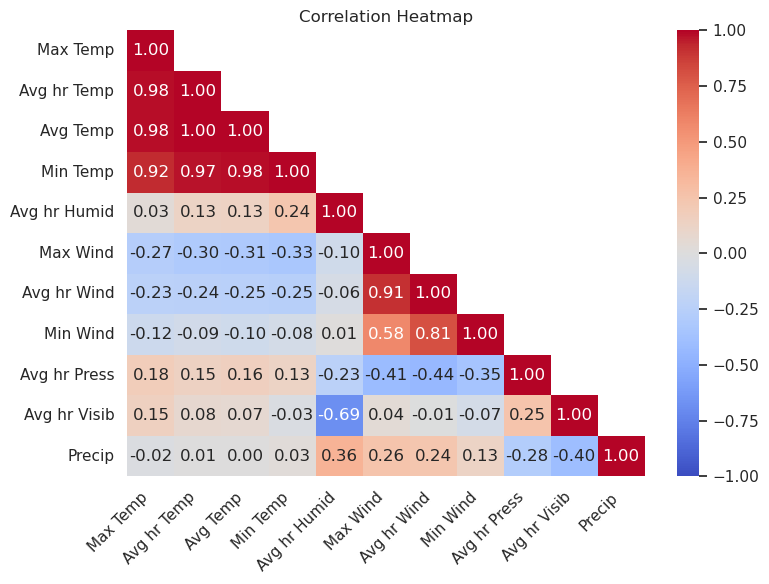

In [80]:
cor_matrix = df.loc[:,:"precipitation"].corr()
column_mapping = {
    'max_temperature': 'Max Temp',
    'min_temperature': 'Min Temp',
    'avg_hourly_temperature': 'Avg hr Temp',
    'avg_temperature': 'Avg Temp',
    'max_wind_speed': 'Max Wind',
    'avg_hourly_wind_speed': 'Avg hr Wind',
    'min_wind_speed': 'Min Wind',
    'avg_hourly_relative_humidity': 'Avg hr Humid',
    'avg_hourly_pressure_sea': 'Avg hr Press',
    'avg_hourly_visibility': 'Avg hr Visib',
    'precipitation': 'Precip'
}
cor_matrix = cor_matrix.rename(columns=column_mapping, index=column_mapping)

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(cor_matrix), k=1)

plt.figure(figsize=(8, 6))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", mask=mask) #xticklabels=df.index.date, yticklabels=df.index.date

plt.xticks(rotation=45, ha='right')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

We calculate **moving averages** to smooth out short-term fluctuations and highlight long-term trends. We then plot both the original data and the moving averages for comparison.

In [86]:
def plot_moving_average(df, columns, window_size=30):
    df_c = df.copy()
    L = len(columns)
    fig, axs = plt.subplots(L, 1, figsize=(15, L*5))
    axs = axs.flatten()
    x_range = (df.index.min(), df.index.max())
    
    for i, c in enumerate(columns):
        # original[c][::5].plot(ax=axs[i], title=c, xlim=x_range, label='Original', linewidth=3, color='black', alpha=1)
        # modified[c][::5].plot(ax=axs[i], title=c, xlim=x_range, label='Modified', linewidth=3, color='red', alpha=0.6)
        # axs[i].legend(loc='upper right')
        # axs[i].set(title=f'{c} values VS. Time')


        # Calculate the moving average
        df_c['moving_average'] = df_c[c].rolling(window=window_size, center=True).mean()

        # Plot original data & moving average
        axs[i].plot(df_c.index, df_c[c], label='Original Data', color='gray')
        axs[i].plot(df_c.index, df_c['moving_average'], label=f'Moving Average (Window={window_size} days)', color='blue')

        capital = ' '.join(word.capitalize() for word in c.split('_'))
        axs[i].set_title(rf"$\bf{{{capital.replace(' ', '~')}}}$ Over Time with Moving Average")
        axs[i].set_xlabel('Date')
        axs[i].set_ylabel(f'{c}')
        axs[i].legend()
        axs[i].set_xlim(x_range)
        axs[i].grid(True)
    
    plt.tight_layout()

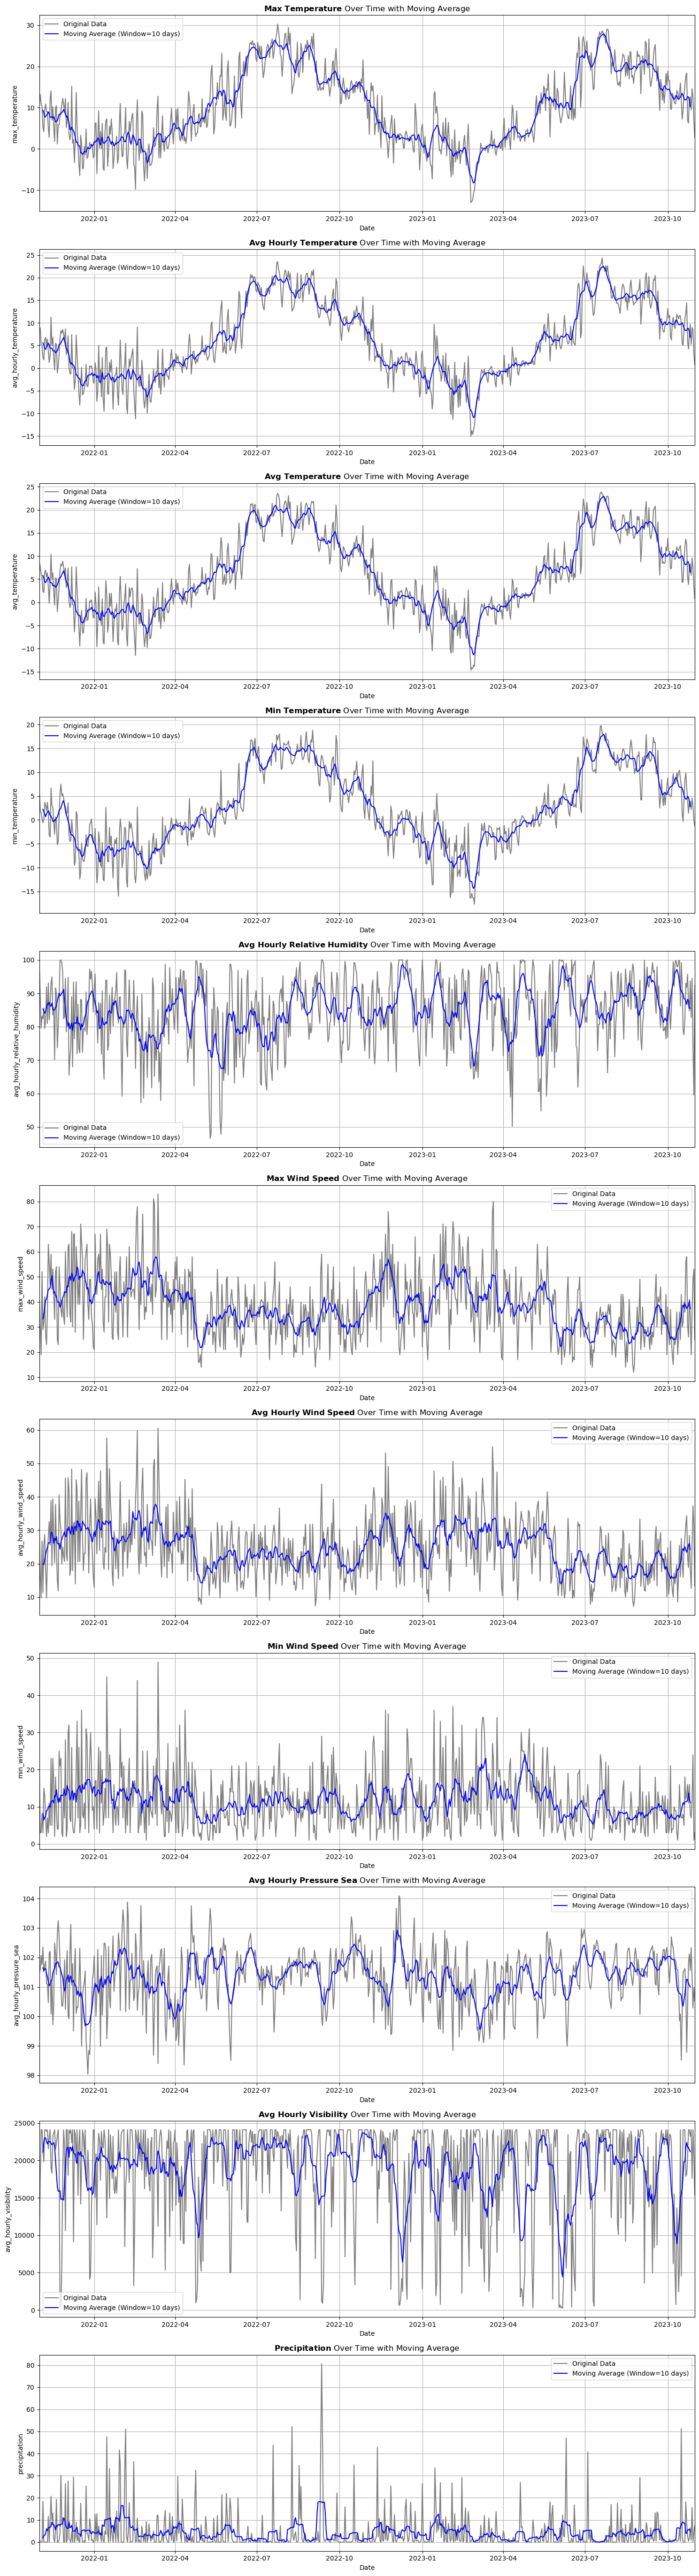

In [87]:
cols = df.columns
# ['avg_hourly_temperature', 'avg_hourly_relative_humidity', 'avg_hourly_wind_speed', 'avg_hourly_pressure_sea',\
# 'avg_hourly_visibility', 'precipitation']
plot_moving_average(df, columns=cols, window_size=10)

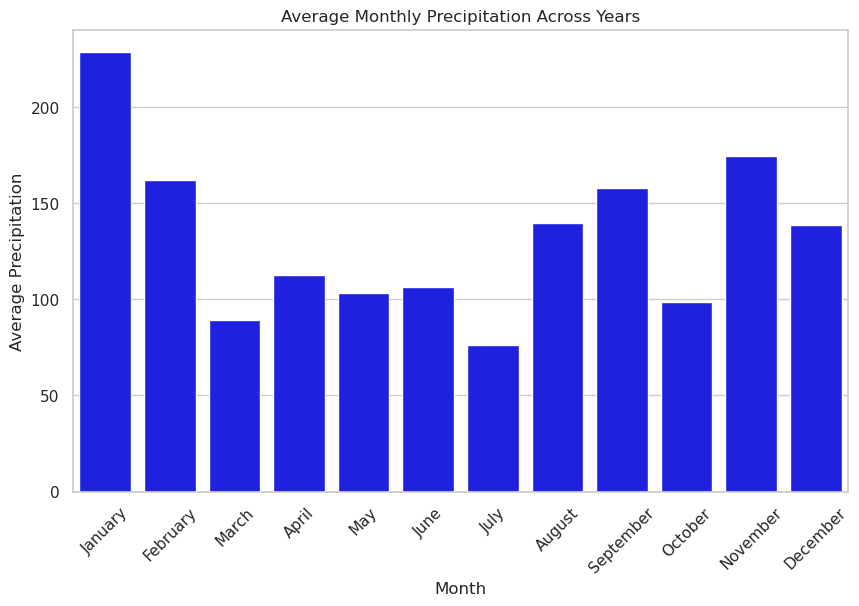

In [22]:
import calendar
df_c = df.copy()

# Assuming df is your DataFrame with a datetime index and a 'precipitation' column
df_c['year'] = df_c.index.year
df_c['month'] = df_c.index.month

# Group by year and month, summing precipitation values
monthly_precipitation_sums = df_c.groupby(['year', 'month'])['precipitation'].sum().reset_index()

# Calculate the average precipitation for each month across different years
average_precipitation_by_month = monthly_precipitation_sums.groupby('month')['precipitation'].mean().reset_index()

# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a bar plot for average precipitation by month
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='precipitation', data=average_precipitation_by_month, color='blue')

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Average Precipitation')
plt.title('Average Monthly Precipitation Across Years')
plt.xticks(range(0, 12), calendar.month_name[1:], rotation=45)  # month names on x-axis

plt.show()

### Pair Plot

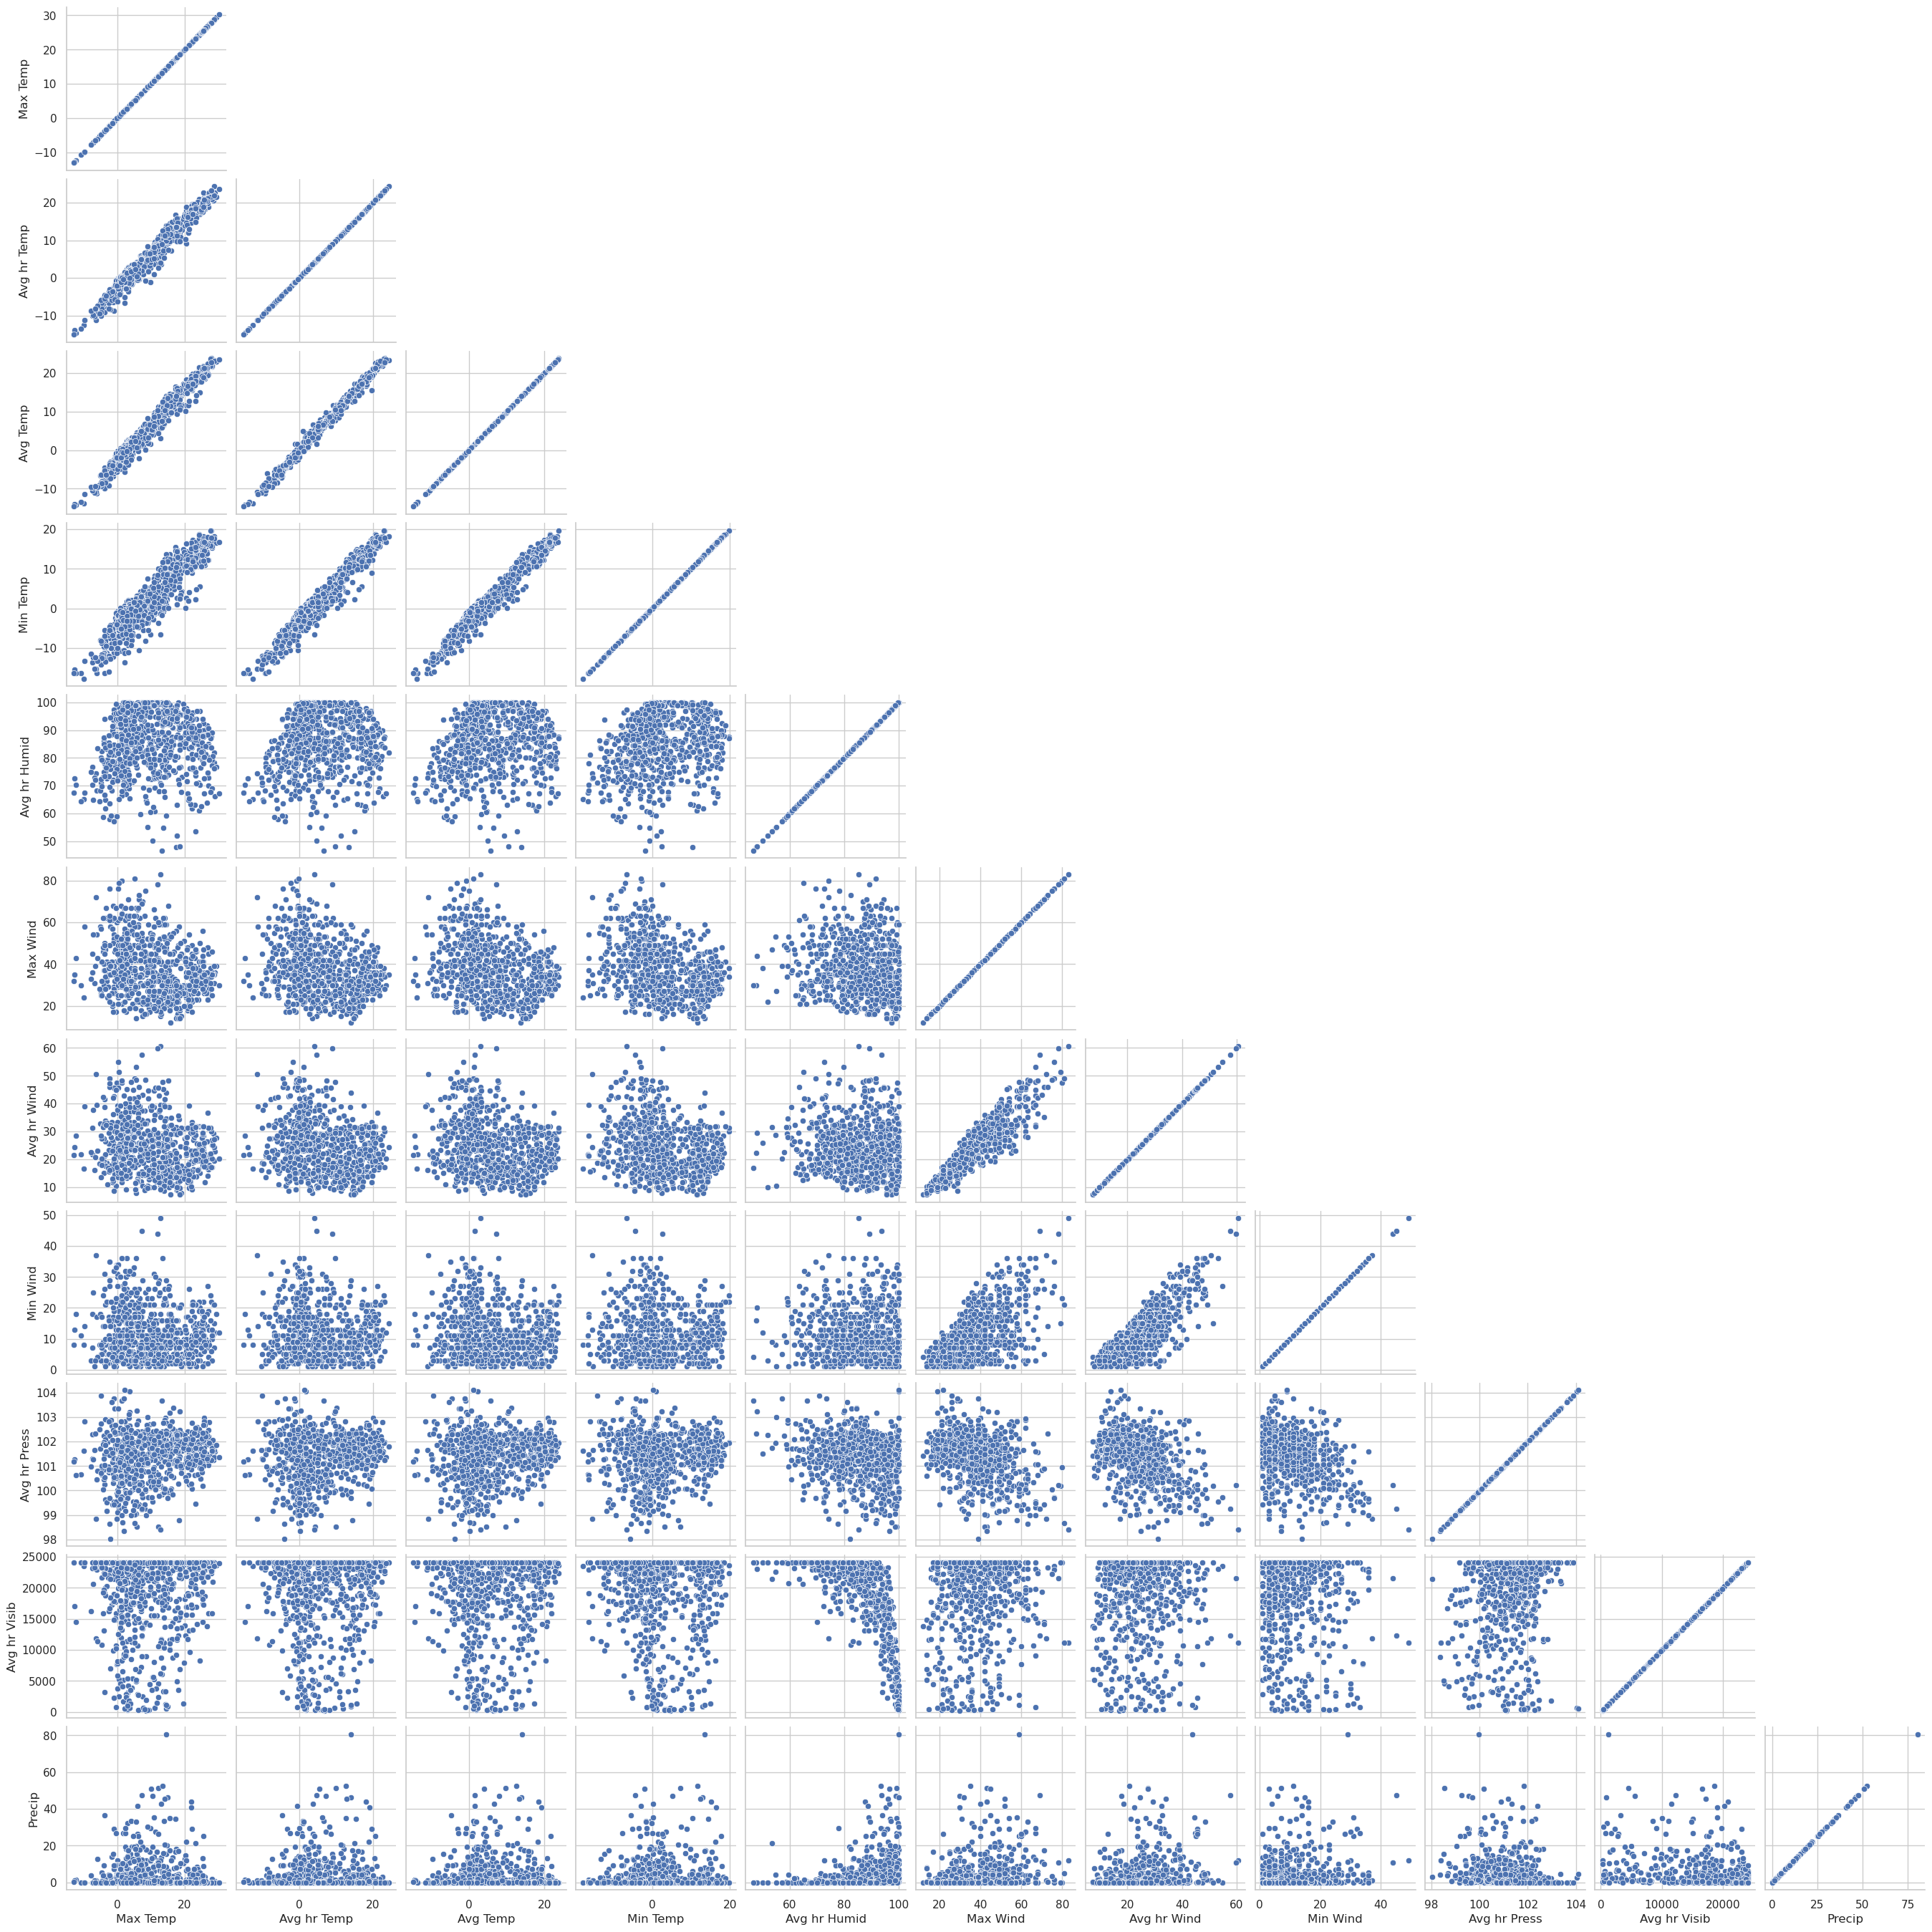

In [99]:
df_pair = df.loc[:,:"precipitation"]
df_pair = df_pair.rename(columns=column_mapping)

sns.pairplot(df_pair[df_pair.columns], corner=True, diag_kind=None)
plt.show()